Mount Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define dataset paths (modify these based on your folder structure)
dataset_path_3 = "/content/drive/MyDrive/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
dataset_path_4 = "/content/drive/MyDrive/sweet pumpkin diseas/Original Images"
original_output_path = "/content/drive/MyDrive/cse438PumkinDS/Original"  # Output path

In [ ]:
import os # Importing the 'os' module

def show_files_in_path(path):
  """Lists files in the given path."""
  try:
    files = os.listdir(path)
    print(f"Files in {path}:")
    for file in files:
      print(file)
  except FileNotFoundError:
    print(f"Error: Path '{path}' not found.")


# Show files in dataset_path_3
show_files_in_path(dataset_path_3)

#Show files in dataset_path_4
show_files_in_path(dataset_path_4)

#Show files in original_output_path
show_files_in_path(original_output_path)


Files in /content/drive/MyDrive/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset:
Healthy Leaf
Mosaic Disease
Bacterial Leaf Spot
Downy Mildew
Powdery_Mildew
Files in /content/drive/MyDrive/sweet pumpkin diseas/Original Images:
Sweet Pumpkin Red Beetle
Sweet Pumpkin Mosaic Disease
Sweet Pumpkin Leaf Curl Disease
Sweet Pumpkin Healthy Leaf
Sweet Pumpkin Downy Mildew Disease
Files in /content/drive/MyDrive/cse438PumkinDS/Original:


In [ ]:
# Ensure the destination folder exists
os.makedirs(original_output_path, exist_ok=True)

In [ ]:
# Function to copy images from all subfolders
def copy_images_from_subfolders(source_folder):
    copied_count = 0
    if os.path.exists(source_folder):
        for subfolder in os.listdir(source_folder):
            subfolder_path = os.path.join(source_folder, subfolder)
            if os.path.isdir(subfolder_path):  # Ensure it's a directory
                for file_name in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, file_name)
                    if os.path.isfile(file_path):  # Ensure it's a file
                        shutil.copy(file_path, destination_path)
                        copied_count += 1
    return copied_count

In [ ]:
import shutil # Importing the shutil module

# Function to copy images from all subfolders
def copy_images_from_subfolders(source_folder, destination_path): # Added destination_path as a parameter
    copied_count = 0
    if os.path.exists(source_folder):
        for subfolder in os.listdir(source_folder):
            subfolder_path = os.path.join(source_folder, subfolder)
            if os.path.isdir(subfolder_path):  # Ensure it's a directory
                for file_name in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, file_name)
                    if os.path.isfile(file_path):  # Ensure it's a file
                        shutil.copy(file_path, destination_path)
                        copied_count += 1
    return copied_count

#Define original_folders with source folder paths
original_folders = [dataset_path_3, dataset_path_4]
# Copy images from both datasets
# Pass original_output_path as the destination to the function
total_copied = sum(copy_images_from_subfolders(folder, original_output_path) for folder in original_folders)

print(f"\n✅ Total Original Images Copied: {total_copied}")


✅ Total Original Images Copied: 3000


In [ ]:
# Destination folder where original images were copied
destination_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Check if the directory exists
if os.path.exists(destination_path):
    # Get all files in the destination folder
    copied_images = [f for f in os.listdir(destination_path) if os.path.isfile(os.path.join(destination_path, f))]

    print(f"\n✅ Total Images in '{destination_path}': {len(copied_images)}")

    # Display some sample images
    if copied_images:
        print("\n📸 Sample Images:")
        print("\n".join(copied_images[:10]))  # Show first 10 images
    else:
        print("\n⚠️ No images found in the destination folder.")

else:
    print("\n❌ Destination folder does not exist.")


✅ Total Images in '/content/drive/MyDrive/cse438PumkinDS/Original': 3000

📸 Sample Images:
Healthy Leaf (108).jpg
Healthy Leaf (110).jpg
Healthy Leaf (113).jpg
Healthy Leaf (107).jpg
Healthy Leaf (11).jpg
Healthy Leaf (1).jpg
Healthy Leaf (109).jpg
Healthy Leaf (104).jpg
Healthy Leaf (106).jpg
Healthy Leaf (101).jpg


In [ ]:
import os
import shutil

# Define source folders
original_folders = {
    "dataset1": "/content/drive/MyDrive/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset",
    "dataset2": "/content/drive/MyDrive/sweet pumpkin diseas/Original Images"
}

# Define destination base folder
destination_base = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Ensure the base destination folder exists
os.makedirs(destination_base, exist_ok=True)

# Function to copy images into class-wise subfolders
def copy_images_classwise(source_folder):
    copied_count = 0
    if os.path.exists(source_folder):
        for class_name in os.listdir(source_folder):
            class_path = os.path.join(source_folder, class_name)
            if os.path.isdir(class_path):  # Ensure it's a folder (class-wise)
                destination_class_folder = os.path.join(destination_base, class_name)
                os.makedirs(destination_class_folder, exist_ok=True)  # Create class folder if not exists

                # Move images into the class-wise folder
                for file_name in os.listdir(class_path):
                    file_path = os.path.join(class_path, file_name)
                    if os.path.isfile(file_path):
                        shutil.copy(file_path, destination_class_folder)
                        copied_count += 1
    return copied_count

# Copy images while maintaining class-wise structure
total_copied = sum(copy_images_classwise(folder) for folder in original_folders.values())

print(f"\n✅ Organized {total_copied} original images into class-wise folders inside '{destination_base}'.")



✅ Organized 3000 original images into class-wise folders inside '/content/drive/MyDrive/cse438PumkinDS/Original'.


In [ ]:
# List the organized class-wise folders
print("\n📂 Organized Dataset Structure:")
for class_name in os.listdir(destination_base):
    class_path = os.path.join(destination_base, class_name)
    if os.path.isdir(class_path):
        num_files = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        print(f"   📁 {class_name}: {num_files} images")



📂 Organized Dataset Structure:
   📁 Healthy Leaf: 400 images
   📁 Mosaic Disease: 400 images
   📁 Bacterial Leaf Spot: 400 images
   📁 Downy Mildew: 400 images
   📁 Powdery_Mildew: 400 images
   📁 Sweet Pumpkin Red Beetle: 200 images
   📁 Sweet Pumpkin Mosaic Disease: 200 images
   📁 Sweet Pumpkin Leaf Curl Disease: 200 images
   📁 Sweet Pumpkin Healthy Leaf: 200 images
   📁 Sweet Pumpkin Downy Mildew Disease: 200 images


Step 2 : EDA

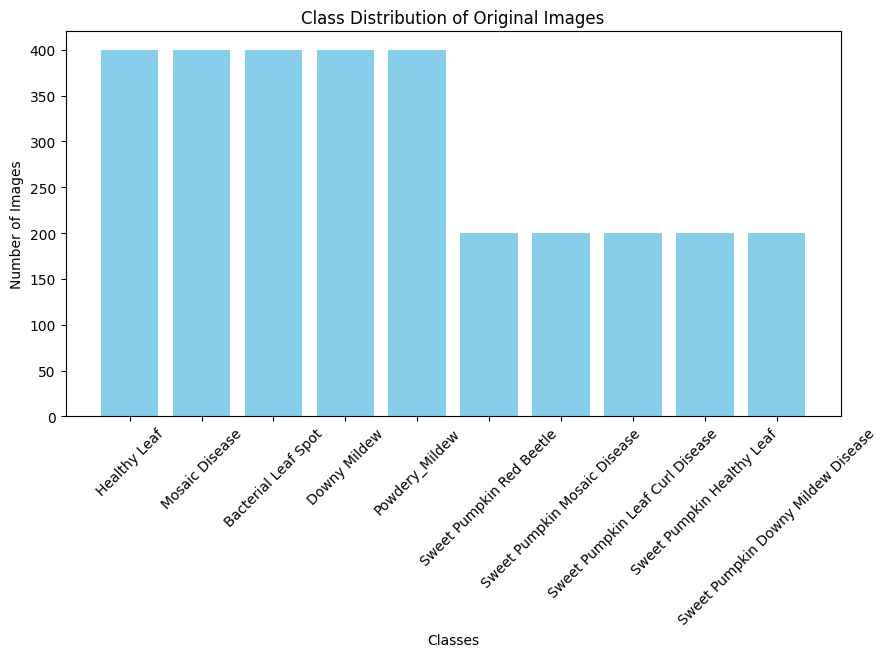


✅ Image Count Per Class:
Healthy Leaf: 400 images
Mosaic Disease: 400 images
Bacterial Leaf Spot: 400 images
Downy Mildew: 400 images
Powdery_Mildew: 400 images
Sweet Pumpkin Red Beetle: 200 images
Sweet Pumpkin Mosaic Disease: 200 images
Sweet Pumpkin Leaf Curl Disease: 200 images
Sweet Pumpkin Healthy Leaf: 200 images
Sweet Pumpkin Downy Mildew Disease: 200 images


In [ ]:
import matplotlib.pyplot as plt

# Path to the organized dataset
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Count images per class
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Display class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Original Images")
plt.show()

print("\n✅ Image Count Per Class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

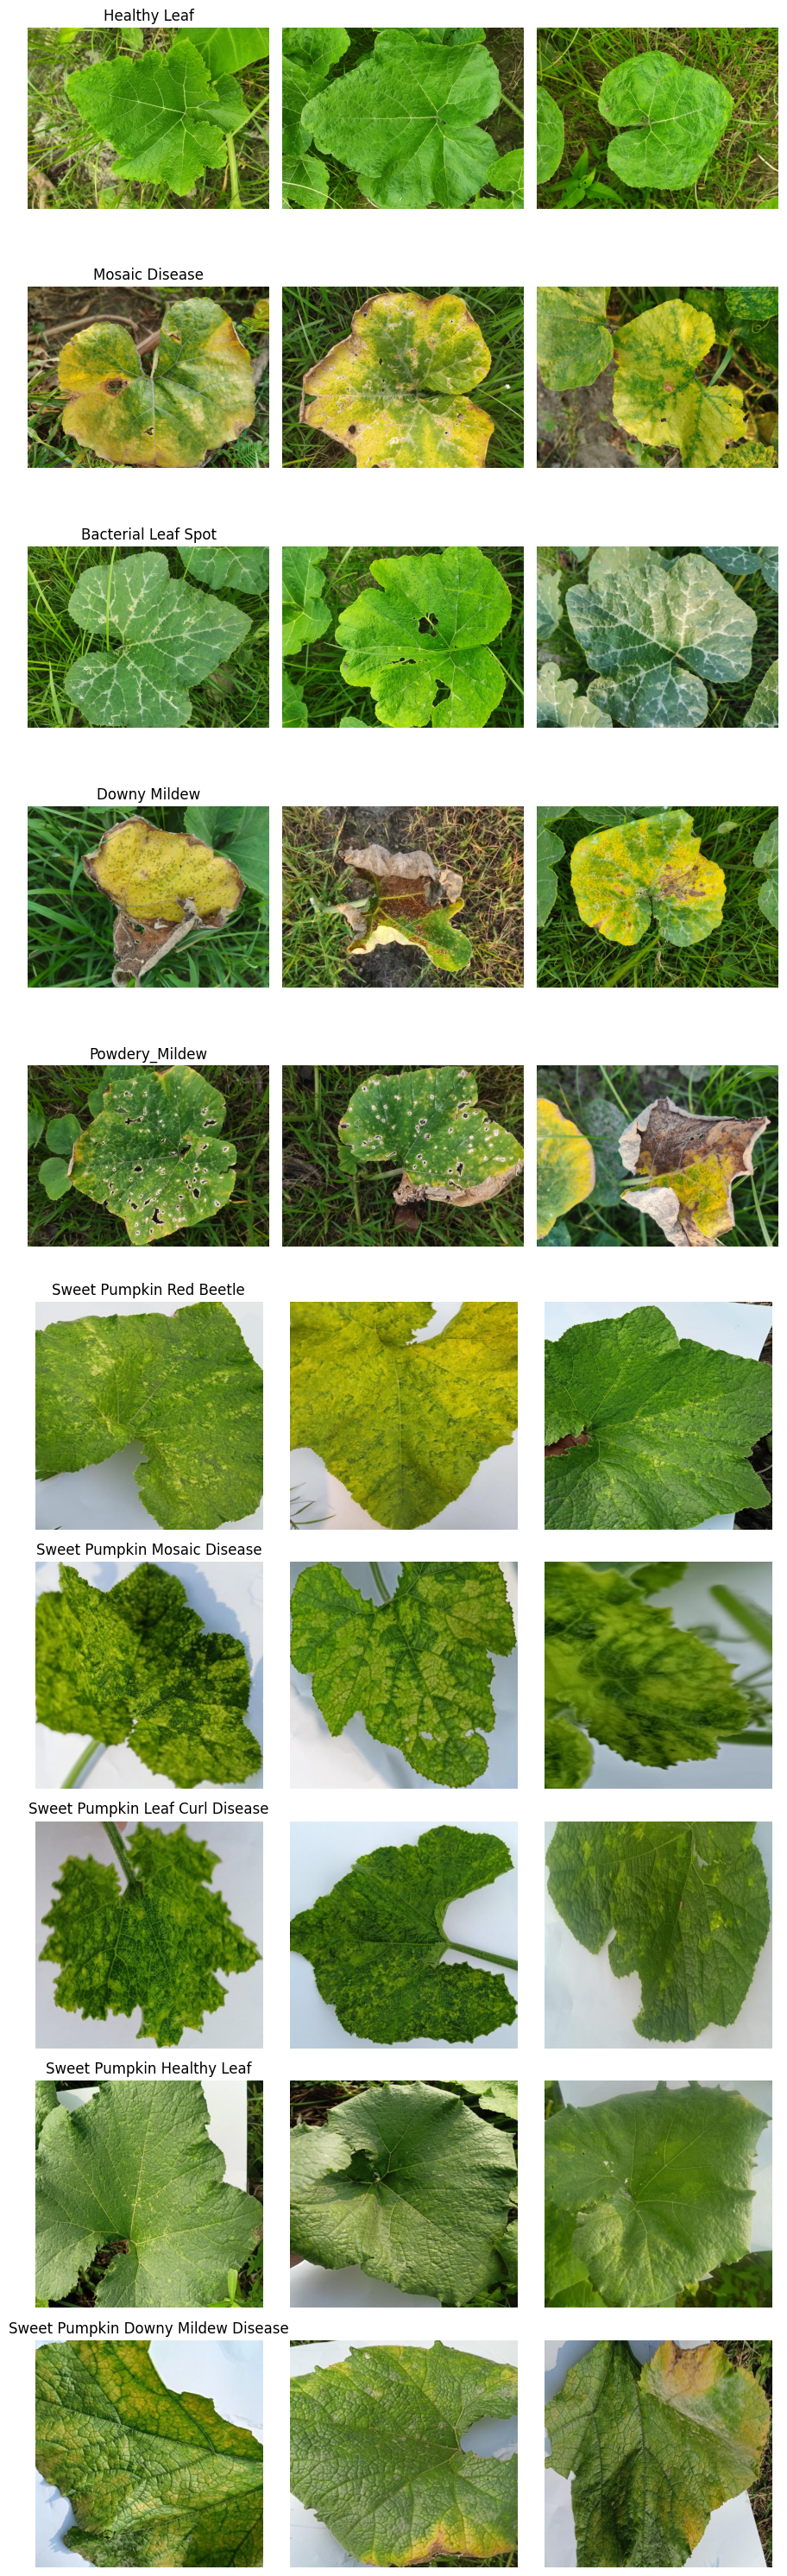

In [ ]:
import cv2
import numpy as np

# Function to show sample images from each class
def show_sample_images(dataset_path, num_samples=3):
    fig, axes = plt.subplots(len(class_counts), num_samples, figsize=(num_samples * 3, len(class_counts) * 3))

    for i, (class_name, _) in enumerate(class_counts.items()):
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))][:num_samples]

        for j, image_name in enumerate(images):
            img_path = os.path.join(class_path, image_name)
            img = cv2.imread(img_path)  # Read image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display images
show_sample_images(dataset_path)


In [ ]:
from PIL import Image

image_shapes = []

# Check image properties (resolution, color channels)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        sample_image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Pick a sample image
        img = Image.open(sample_image_path)
        image_shapes.append(img.size)  # (width, height)

# Display unique image sizes
unique_sizes = set(image_shapes)
print("\n Unique Image Sizes in Dataset:", unique_sizes)



 Unique Image Sizes in Dataset: {(800, 599), (800, 600), (512, 512)}


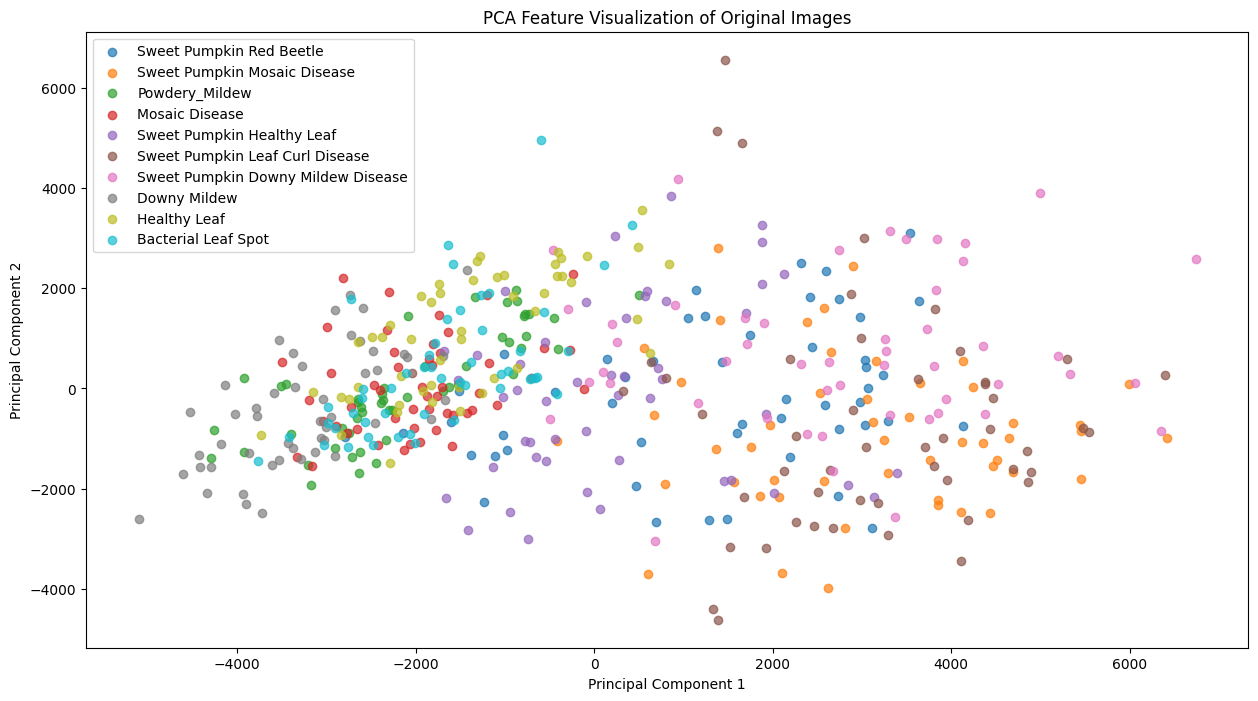

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Extract image feature vectors
def extract_features(image_path):
    img = Image.open(image_path).resize((64, 64))  # Resize for consistency
    img_array = np.array(img).flatten()  # Flatten to 1D
    return img_array

# Collect features and labels
features, labels = [], []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path)[:50]:  # Take a subset for faster processing
            img_path = os.path.join(class_path, img_file)
            features.append(extract_features(img_path))
            labels.append(class_name)

features = np.array(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Scatter plot
plt.figure(figsize=(15, 8))
for class_name in set(labels):
    indices = [i for i, label in enumerate(labels) if label == class_name]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=class_name, alpha=0.7)

plt.legend()
plt.title("PCA Feature Visualization of Original Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


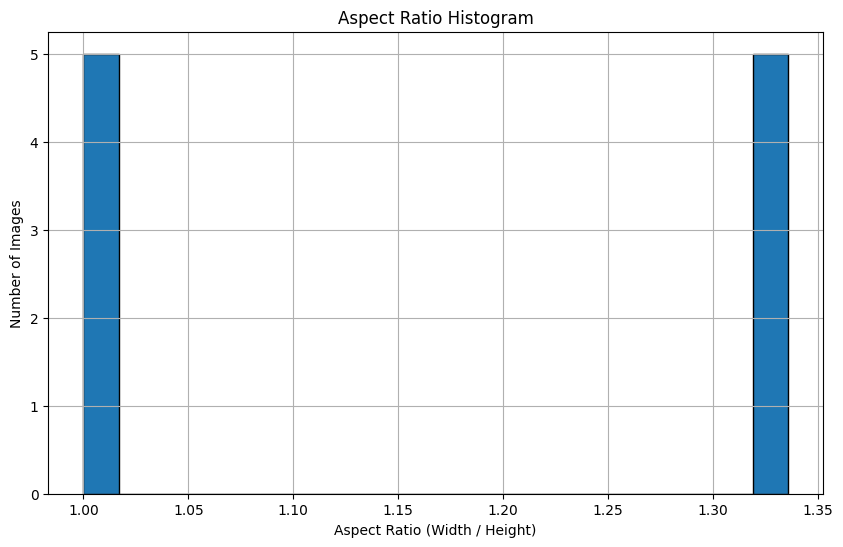

In [ ]:
import matplotlib.pyplot as plt

# 'image_shapes' list contains tuples of (width, height)
aspect_ratios = [width / height for width, height in image_shapes]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=20, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Number of Images')
plt.title('Aspect Ratio Histogram')
plt.grid(True)
plt.show()


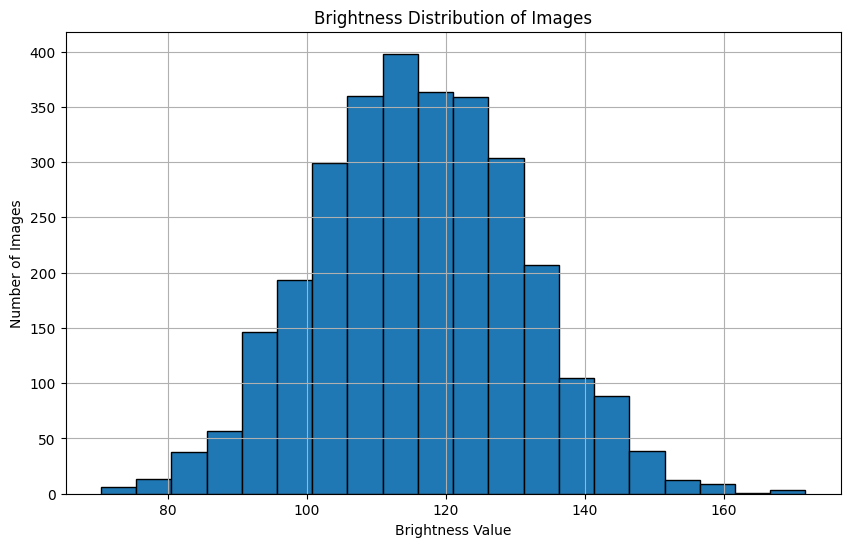

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Assuming 'destination_path' is defined and contains image paths
destination_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

brightness_values = []

# Iterate through images in destination folder
for filename in os.listdir(destination_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(destination_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Read image in grayscale

        if img is not None:
            brightness = np.mean(img)  # Calculate average brightness
            brightness_values.append(brightness)

# Create the brightness distribution plot (barplot)
plt.figure(figsize=(10, 6))
plt.hist(brightness_values, bins=20, edgecolor='black')
plt.xlabel("Brightness Value")
plt.ylabel("Number of Images")
plt.title("Brightness Distribution of Images")
plt.grid(True)
plt.show()


step 3

In [ ]:
import os
import shutil
import random

# Paths
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"
output_base = "/content/drive/MyDrive/cse438PumkinDS/Split"

# Split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Ensure output directories exist
split_dirs = ["train", "valid", "test"]
for split in split_dirs:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Split function
def split_dataset():
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            random.shuffle(images)

            train_split = int(len(images) * train_ratio)
            val_split = int(len(images) * (train_ratio + val_ratio))

            split_data = {
                "train": images[:train_split],
                "valid": images[train_split:val_split],
                "test": images[val_split:]
            }

            for split, img_list in split_data.items():
                split_class_path = os.path.join(output_base, split, class_name)
                os.makedirs(split_class_path, exist_ok=True)
                for img in img_list:
                    shutil.copy(os.path.join(class_path, img), os.path.join(split_class_path, img))

split_dataset()
print("\n✅ Dataset split into Training, Validation, and Test sets successfully!")



✅ Dataset split into Training, Validation, and Test sets successfully!


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets
train_dataset = ImageFolder(root=os.path.join(output_base, "train"), transform=transform)
valid_dataset = ImageFolder(root=os.path.join(output_base, "valid"), transform=transform)
test_dataset = ImageFolder(root=os.path.join(output_base, "test"), transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Validation samples: {len(valid_dataset)}")
print(f"✅ Testing samples: {len(test_dataset)}")


✅ Training samples: 2400
✅ Validation samples: 300
✅ Testing samples: 300


step 4

In [ ]:
#check number of classes
import os

# Path to the organized dataset
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Count the number of classes (subfolders) in the dataset
num_classes = len([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

print(f"Number of classes in the dataset: {num_classes}")


Number of classes in the dataset: 10


resnext50

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# Define dataset path
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNeXt-50 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# Load dataset
# Corrected paths to point to the Split directory where the train/val/test subfolders are located
train_dataset = datasets.ImageFolder(root=f"{output_base}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{output_base}/valid", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{output_base}/test", transform=transform)

In [ ]:
# DataLoaders
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Load pre-trained ResNeXt-50 model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnext50_32x4d(pretrained=True)

# Modify the final layer for 10-class classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 121MB/s]


In [ ]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%")


Epoch 1/5, Loss: 1.7577, Train Acc: 35.21%
Epoch 2/5, Loss: 1.2724, Train Acc: 51.71%
Epoch 3/5, Loss: 1.0932, Train Acc: 59.21%
Epoch 4/5, Loss: 0.9606, Train Acc: 64.00%
Epoch 5/5, Loss: 0.8606, Train Acc: 68.17%


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "resnext50_pumpkin.pth")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Verify saved model architecture
checkpoint = torch.load("resnext50_pumpkin.pth", map_location=device)
print(checkpoint.keys())  # Check if 'model_state_dict' or expected keys exist


odict_keys(['features.conv0.weight', 'features.norm0.weight', 'features.norm0.bias', 'features.norm0.running_mean', 'features.norm0.running_var', 'features.norm0.num_batches_tracked', 'features.denseblock1.denselayer1.norm1.weight', 'features.denseblock1.denselayer1.norm1.bias', 'features.denseblock1.denselayer1.norm1.running_mean', 'features.denseblock1.denselayer1.norm1.running_var', 'features.denseblock1.denselayer1.norm1.num_batches_tracked', 'features.denseblock1.denselayer1.conv1.weight', 'features.denseblock1.denselayer1.norm2.weight', 'features.denseblock1.denselayer1.norm2.bias', 'features.denseblock1.denselayer1.norm2.running_mean', 'features.denseblock1.denselayer1.norm2.running_var', 'features.denseblock1.denselayer1.norm2.num_batches_tracked', 'features.denseblock1.denselayer1.conv2.weight', 'features.denseblock1.denselayer2.norm1.weight', 'features.denseblock1.denselayer2.norm1.bias', 'features.denseblock1.denselayer2.norm1.running_mean', 'features.denseblock1.denselayer2

In [ ]:
model.load_state_dict(torch.load("resnext50_pumpkin.pth", map_location=device), strict=False)


_IncompatibleKeys(missing_keys=['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.conv3.weight', 'layer1.1.bn3.weight', 'layer1.1.bn3.bias', 'layer1.1.bn3.runni

In [ ]:
missing_keys, unexpected_keys = model.load_state_dict(torch.load("resnext50_pumpkin.pth"), strict=False)
print("Missing Keys:", missing_keys)
print("Unexpected Keys:", unexpected_keys)


Missing Keys: ['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.conv3.weight', 'layer1.1.bn3.weight', 'layer1.1.bn3.bias', 'layer1.1.bn3.running_mean', 'layer1

In [ ]:
def calculate_recall(predictions, true_labels):
    """Calculates the recall for a binary classification problem.

    Args:
        predictions: A list or numpy array of predicted labels (0 or 1).
        true_labels: A list or numpy array of true labels (0 or 1).

    Returns:
        The recall score (float), or None if there are no true positive cases.
    """
    true_positives = 0
    false_negatives = 0

    for i in range(len(predictions)):
        if predictions[i] == 1 and true_labels[i] == 1:
            true_positives += 1
        elif predictions[i] == 0 and true_labels[i] == 1:
            false_negatives += 1

    if true_positives + false_negatives == 0:
        return None # Handle the case where there are no true positive cases

    return true_positives / (true_positives + false_negatives)


# Example usage:
predictions = [1, 0, 1, 1, 0, 1]  # Predicted labels
true_labels = [1, 1, 0, 1, 0, 1]  # True labels

recall = calculate_recall(predictions, true_labels)

if recall is not None:
  print("Recall:", recall)
else:
  print("Recall cannot be calculated (no true positives or true positives + false negatives = 0)")


Recall: 0.75


In [ ]:
def calculate_precision(predictions, true_labels):
    """Calculates the precision for a binary classification problem.

    Args:
        predictions: A list or numpy array of predicted labels (0 or 1).
        true_labels: A list or numpy array of true labels (0 or 1).

    Returns:
        The precision score (float), or 0 if there are no true positive cases.
    """
    true_positives = 0
    false_positives = 0

    for i in range(len(predictions)):
        if predictions[i] == 1 and true_labels[i] == 1:
            true_positives += 1
        elif predictions[i] == 1 and true_labels[i] == 0:
            false_positives += 1

    if true_positives + false_positives == 0:
        return 0  # Handle the case where there are no true positive cases

    return true_positives / (true_positives + false_positives)

# Example usage (replace with your actual predictions and true labels):
predictions = [1, 0, 1, 1, 0, 1]  # Predicted labels
true_labels = [1, 1, 0, 1, 0, 1]  # True labels

precision = calculate_precision(predictions, true_labels)
print("Precision:", precision)


Precision: 0.75


In [ ]:
def calculate_f1_score(precision, recall):
    """Calculates the F1 score.

    Args:
        precision: The precision score.
        recall: The recall score.

    Returns:
        The F1 score (float), or 0 if precision or recall is 0.
    """
    if precision == 0 or recall == 0:
        return 0

    return 2 * (precision * recall) / (precision + recall)

precision = 0.75
recall = 0.75

f1_score = calculate_f1_score(precision, recall)
print("F1 Score:", f1_score)


F1 Score: 0.75


DenseNet-201

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# Define dataset path
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # DenseNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# Load dataset
# Corrected paths to point to the Split directory where the train/val/test subfolders are located
train_dataset = datasets.ImageFolder(root=f"{output_base}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{output_base}/valid", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{output_base}/test", transform=transform)

In [ ]:
# DataLoaders
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained DenseNet-201 model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.densenet201(pretrained=True)

# Modify the final layer for 10-class classification
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 10)  # 10 classes
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 79.2MB/s]


In [ ]:
# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%")


Epoch 1/3, Loss: 1.4759, Train Acc: 45.71%
Epoch 2/3, Loss: 1.0592, Train Acc: 61.79%
Epoch 3/3, Loss: 0.9345, Train Acc: 66.29%


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "densenet201_pumpkin.pth")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
#calculate recall precision f1 score for  densenet201
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate metrics
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


Recall: 0.7500
Precision: 0.7905
F1-score: 0.7523


In [ ]:
# prompt: calculate accuracy for densenet201

from sklearn.metrics import recall_score, precision_score, f1_score
#calculate recall precision f1 score for  densenet201
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate metrics
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


ShuffleNet v2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [ ]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ShuffleNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define dataset paths
dataset_path = "/content/drive/MyDrive/cse438PumkinDS/Original"
split_path = "/content/drive/MyDrive/cse438PumkinDS/Split"

# Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(split_path, "train"), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join(split_path, "valid"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(split_path, "test"), transform=transform)

# Create data loaders
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print class names
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")


Number of classes: 10


In [ ]:
# Load ShuffleNet v2 model
model = models.shufflenet_v2_x1_0(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify for your dataset
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 18.3MB/s]


In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Train Accuracy: {train_acc:.2f}%")


Epoch [1/3], Loss: 587.1575, Train Accuracy: 57.92%
Epoch [2/3], Loss: 345.9330, Train Accuracy: 75.42%
Epoch [3/3], Loss: 252.9290, Train Accuracy: 81.71%


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

val_acc = 100 * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")


Validation Accuracy: 88.33%


In [ ]:
torch.save(model.state_dict(), "shufflenet_v2_pumpkin.pth")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
#calculate recall precision and f1 score for this model
from sklearn.metrics import recall_score, precision_score, f1_score # Import necessary functions


model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate metrics
# Use the imported f1_score function, not the overwritten variable
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

Recall: 0.8733
Precision: 0.8846
F1-score: 0.8735


AmoebaNet

In [ ]:
pip install timm torch torchvision

In [ ]:
!pip install --upgrade timm

In [ ]:
import timm
import torch.nn as nn

# List available models to find a similar one if 'amoebanet_d_n6f0d40' is not found
# print(timm.list_models())

# Attempt to create the model (after upgrading timm)
try:
    model = timm.create_model('amoebanet_d_n6f0d40', pretrained=True)
except RuntimeError:
    print("Model 'amoebanet_d_n6f0d40' not found. Please choose a different model from timm.list_models().")
    # Example: Using a different model
    model = timm.create_model('efficientnet_b0', pretrained=True)


Model 'amoebanet_d_n6f0d40' not found. Please choose a different model from timm.list_models().


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001) # Only optimize classifier

# Training loop
num_epochs = 3  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%")



Epoch 1/3, Loss: 1.6947, Train Acc: 52.96%
Epoch 2/3, Loss: 0.8381, Train Acc: 72.62%
Epoch 3/3, Loss: 0.6944, Train Acc: 77.21%


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "amoebanet_pumpkin.pth")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Evaluation (similar to other models)
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate metrics
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


Recall: 0.8033
Precision: 0.8172
F1-score: 0.8054


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GhostNet

In [ ]:
pip install torch torchvision timm tqdm pillow matplotlib

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define paths
split_path = "/content/drive/MyDrive/cse438PumkinDS/Split"
train_dir = os.path.join(split_path, "train")
val_dir = os.path.join(split_path, "valid")
test_dir = os.path.join(split_path, "test")

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # GhostNet expects 224x224 inputs
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create data loaders
batch_size = 8  # Reduce to 4 if you get memory errors
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check class names
class_names = train_dataset.classes
print("Class names:", class_names)

Class names: ['Bacterial Leaf Spot', 'Downy Mildew', 'Healthy Leaf', 'Mosaic Disease', 'Powdery_Mildew', 'Sweet Pumpkin Downy Mildew Disease', 'Sweet Pumpkin Healthy Leaf', 'Sweet Pumpkin Leaf Curl Disease', 'Sweet Pumpkin Mosaic Disease', 'Sweet Pumpkin Red Beetle']


In [ ]:
import timm
import torch.nn as nn

# Load pre-trained GhostNet (smallest variant)
model = timm.create_model('ghostnet_100', pretrained=True)

# Replace classifier head
num_classes = len(class_names)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# Freeze all layers except classifier
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

# Move to CPU
device = torch.device("cpu")
model = model.to(device)
print(f"GhostNet initialized for {num_classes} classes!")

model.safetensors:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

GhostNet initialized for 10 classes!


In [ ]:
import torch.optim as optim
from tqdm import tqdm

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Low learning rate for fine-tuning

epochs = 3
best_val_acc = 0.0

for epoch in range(epochs):
    # Training
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=running_loss/len(train_loader))

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "ghostnet_best.pth")

Epoch 1/3: 100%|██████████| 300/300 [02:57<00:00,  1.69it/s, loss=2.11]


Validation Accuracy: 49.67%


Epoch 2/3: 100%|██████████| 300/300 [02:15<00:00,  2.21it/s, loss=1.82]


Validation Accuracy: 64.67%


Epoch 3/3: 100%|██████████| 300/300 [02:12<00:00,  2.26it/s, loss=1.6]


Validation Accuracy: 70.33%


In [ ]:
# Load best model
model.load_state_dict(torch.load("ghostnet_best.pth", map_location=device))

# Test accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Classification report
from sklearn.metrics import classification_report
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

Test Accuracy: 74.33%
                                    precision    recall  f1-score   support

               Bacterial Leaf Spot       0.82      0.57      0.68        40
                      Downy Mildew       0.78      0.88      0.82        40
                      Healthy Leaf       0.76      0.95      0.84        40
                    Mosaic Disease       0.82      0.93      0.87        40
                    Powdery_Mildew       0.71      0.72      0.72        40
Sweet Pumpkin Downy Mildew Disease       0.87      0.65      0.74        20
        Sweet Pumpkin Healthy Leaf       0.91      1.00      0.95        20
   Sweet Pumpkin Leaf Curl Disease       0.43      0.60      0.50        20
      Sweet Pumpkin Mosaic Disease       0.61      0.70      0.65        20
          Sweet Pumpkin Red Beetle       0.67      0.10      0.17        20

                          accuracy                           0.74       300
                         macro avg       0.74      0.71      0.7

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Calculate metrics
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


Recall: 0.7433
Precision: 0.7505
F1-score: 0.7255
